# Классификация рукописных цифр с помощью нейронной сети

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

2025-03-04 16:11:21.714968: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-04 16:11:21.837607: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-04 16:11:21.837624: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-03-04 16:11:21.865074: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-04 16:11:22.445150: W tensorflow/stream_executor/platform/de

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
y_train_cat = keras.utils.to_categorical(y_train, 10) 
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [19]:
x_train[30].shape

(28, 28)

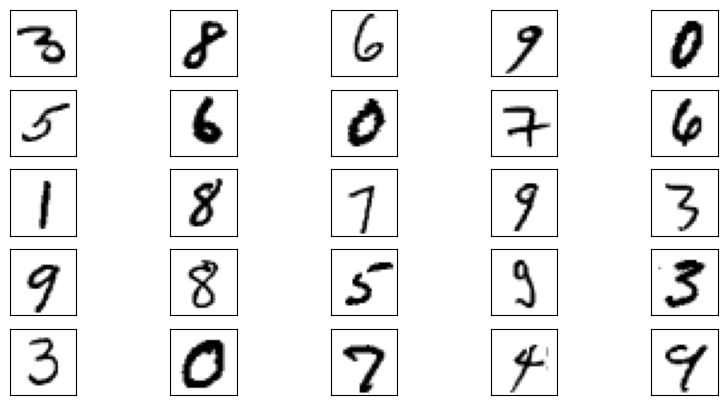

In [7]:
plt.figure(figsize=(10, 5))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i+30], cmap=plt.cm.binary)
plt.show()


In [11]:
model = keras.Sequential([ 
    Flatten(input_shape=(28, 28)), 
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax') 
])

In [12]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model = keras.Sequential([ 
    Flatten(input_shape=(28, 28)), 
    Dense(256, activation='relu'), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') 
])

In [15]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
epochs_list = [5, 10, 20]
results = {}
for epochs in epochs_list:
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train_cat, batch_size=32, 
              epochs=epochs, validation_split=0.2)
    loss, accuracy = model.evaluate(x_test, y_test_cat)

    results[epochs] = accuracy

results

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2328 - accuracy: 0.9304 - val_loss: 0.1330 - val_accuracy: 0.9578
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0985 - accuracy: 0.9699 - val_loss: 0.0977 - val_accuracy: 0.9704
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0669 - accuracy: 0.9794 - val_loss: 0.1036 - val_accuracy: 0.9706
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0525 - accuracy: 0.9830 - val_loss: 0.0946 - val_accuracy: 0.9746
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.9744
Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0384 - accuracy: 0.9873 - val_loss: 0.0964 - val_accuracy: 0.9745
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0991 - val_accuracy: 0.9743
Epoch 3/10
1500/1500 [===================

{5: 0.974399983882904, 10: 0.9776999950408936, 20: 0.979200005531311}

In [20]:
from sklearn.metrics import precision_score, recall_score

In [22]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [23]:
predicted_classes = np.argmax(predictions, axis=1)  # Convert one-hot output to class labels

precision = precision_score(y_test, predicted_classes, average='weighted')
recall = recall_score(y_test, predicted_classes, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.98
Recall: 0.98


In [24]:
from sklearn.metrics import classification_report,confusion_matrix

print(" Classification Report for the test group : \n")
print(classification_report(y_test,predicted_classes),"\n\n")

 Classification Report for the test group : 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 




In [25]:
CM_RFC=confusion_matrix(y_test,predicted_classes)
print(CM_RFC)

[[ 971    1    2    0    0    2    1    2    1    0]
 [   0 1126    2    1    0    0    2    1    3    0]
 [   3    0 1008    9    1    0    2    4    5    0]
 [   0    0    1  987    0    9    0    4    5    4]
 [   1    1    3    0  957    1    6    1    0   12]
 [   2    0    0   12    0  870    2    0    4    2]
 [   4    1    0    1    3    3  946    0    0    0]
 [   2    4    9    3    0    0    0 1004    2    4]
 [   3    0    3    6    4    3    5    3  942    5]
 [   1    2    2    3    6    5    0    7    2  981]]


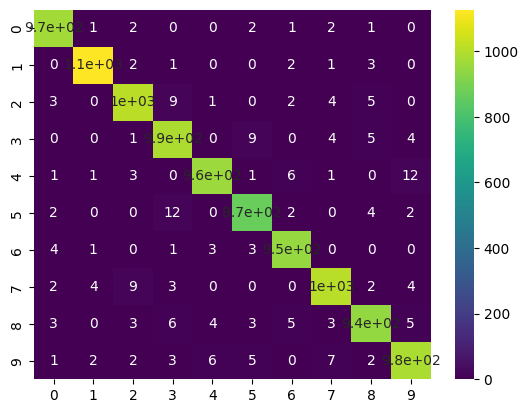

In [26]:
import seaborn as sns

sns.heatmap(CM_RFC,annot=True,cmap="viridis")
plt.show()